# Lab 1

In [2]:
import os
from pathlib import Path

LAB = "lab1"
BASE_DIR = Path(os.path.abspath("")).resolve(strict=True).parent
OUT_BASE_DIR = os.path.join(BASE_DIR, "out", LAB)
STATIC_BASE_DIR = os.path.join(BASE_DIR, "static", LAB)

In [32]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import color, exposure, filters, io, morphology, util

## Point Processing

### Inverse/Negative Image

In [4]:
tire = io.imread(f"{STATIC_BASE_DIR}/tire.jpg")
tire_neg = 255 - tire

(-0.5, 231.5, 205.5, -0.5)

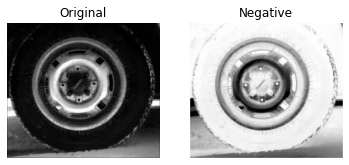

In [19]:
plt.subplot(1, 2, 1)
plt.imshow(tire)
plt.title("Original")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(tire_neg)
plt.title("Negative")
plt.axis("off")

### Log Processing

In [6]:
C1 = 0.5
C2 = 2

a = tire / 255
tire_log1 = C1 * np.log(1 + a)
tire_log2 = C2 * np.log(1 + a)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


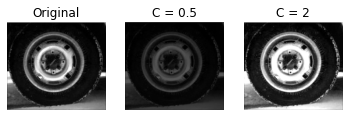

In [7]:
plt.subplot(1, 3, 1)
plt.imshow(tire)
plt.title("Original")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(tire_log1)
plt.title("C = 0.5")
plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(tire_log2)
plt.title("C = 2")
plt.axis("off")
plt.show()

### Gamma Transformation

In [8]:
C = 1
P1 = 0.5
P2 = 2

a = tire / 255
tire_gamma1 = C * (a ** P1)
tire_gamma2 = C * (a ** P2)

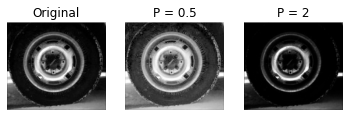

In [9]:
plt.subplot(1, 3, 1)
plt.imshow(tire)
plt.title("Original")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(tire_gamma1)
plt.title("P = 0.5")
plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(tire_gamma2)
plt.title("P = 2")
plt.axis("off")
plt.show()

### Contrast Stretching

In [10]:
contrast_ori = io.imread(f"{STATIC_BASE_DIR}/contrast_ori.jpg")
max_range = max(contrast_ori.flatten())
min_range = min(contrast_ori.flatten())
b = int(np.floor(255 / (max_range - min_range)))
contrast_stretched = (contrast_ori - min_range) * b

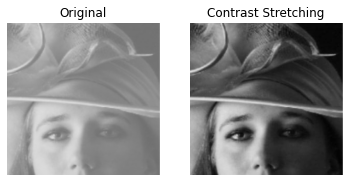

In [11]:
plt.subplot(1, 2, 1)
plt.imshow(contrast_ori)
plt.title("Original")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(contrast_stretched)
plt.title("Contrast Stretching")
plt.axis("off")
plt.show()

### Image Histogram

In [17]:
contrast_ori_histogram = util.img_as_ubyte(color.rgb2gray(contrast_ori))
contrast_stretched_histogram = util.img_as_ubyte(color.rgb2gray(contrast_stretched))

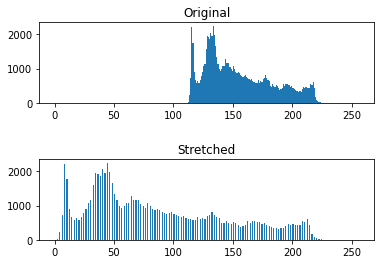

In [53]:
plt.subplot(2, 1, 1)
plt.hist(contrast_ori_histogram.flatten(), 256, range=(0, 256))
plt.title("Original")
plt.subplot(2, 1, 2)
plt.hist(contrast_stretched_histogram.flatten(), 256, range=(0, 256))
plt.title("Stretched")
plt.subplots_adjust(hspace=0.7)
plt.show()

### Histogram Equalization

In [25]:
cont_exp = exposure.equalize_hist(contrast_ori)
cont_exp_histogram = util.img_as_ubyte(color.rgb2gray(cont_exp))

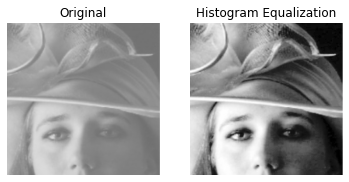

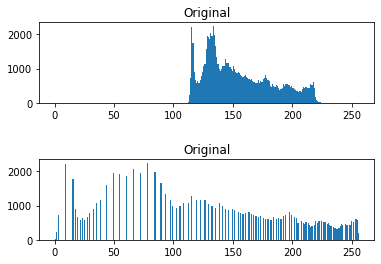

In [26]:
plt.subplot(1, 2, 1)
plt.imshow(contrast_ori)
plt.title("Original")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(cont_exp)
plt.title("Histogram Equalization")
plt.axis("off")
plt.show()
plt.subplot(2, 1, 1)
plt.hist(contrast_ori_histogram.flatten(), 256, range=(0, 256))
plt.title("Original")
plt.subplot(2, 1, 2)
plt.hist(cont_exp_histogram.flatten(), 256, range=(0, 256))
plt.title("Original")
plt.subplots_adjust(hspace=0.7)
plt.show()

### Image Substraction

In [29]:
jump = io.imread(f"{STATIC_BASE_DIR}/original.jpg")
jump_bg = io.imread(f"{STATIC_BASE_DIR}/background.jpg")
jump_no_bg = np.subtract(jump, jump_bg, dtype="int16")

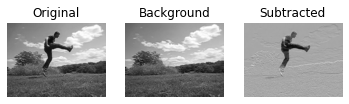

In [31]:
plt.subplot(1, 3, 1)
plt.imshow(jump, cmap="gray")
plt.title("Original")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(jump_bg, cmap="gray")
plt.title("Background")
plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(jump_no_bg, cmap="gray")
plt.title("Subtracted")
plt.axis("off")
plt.show()

## Mask Processing

### Smoothing Filter

#### Linear Filter

##### Average Filter

In [33]:
tire_gray = color.rgb2gray(tire)
tire_avg = filters.rank.mean(tire_gray, selem=morphology.square(4))

/home/ilman/.cache/pypoetry/virtualenvs/csce604133-1fSMZr-E-py3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


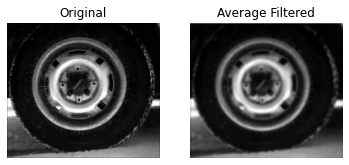

In [35]:
plt.subplot(1, 2, 1)
plt.imshow(tire, cmap='gray',vmin=0,vmax=255)
plt.title("Original")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(tire_avg, cmap='gray',vmin=0,vmax=255)
plt.title("Average Filtered")
plt.axis("off")
plt.show()

##### Gaussian Filter

In [37]:
tire_gauss = util.img_as_ubyte(filters.gaussian(tire_gray, sigma=1))

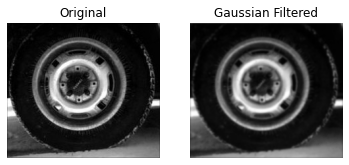

In [38]:
plt.subplot(1, 2, 1)
plt.imshow(tire, cmap='gray',vmin=0,vmax=255)
plt.title("Original")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(tire_gauss, cmap='gray',vmin=0,vmax=255)
plt.title("Gaussian Filtered")
plt.axis("off")
plt.show()

#### Non Linear Filter

##### Median Filter

In [39]:
tire_noisy = util.img_as_ubyte(util.random_noise(tire_gray, mode="s&p", salt_vs_pepper=0.02))
tire_med = filters.rank.median(tire_noisy, selem=morphology.square(4))

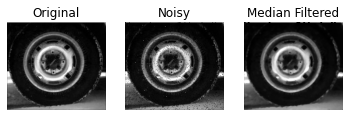

In [41]:
plt.subplot(1, 3, 1)
plt.imshow(tire)
plt.title("Original")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(tire_noisy, cmap='gray',vmin=0,vmax=255)
plt.title("Noisy")
plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(tire_med, cmap='gray',vmin=0,vmax=255)
plt.title("Median Filtered")
plt.axis("off")
plt.show()

##### Minimum Filter

In [42]:
tire_min = filters.rank.minimum(tire_gray, selem=morphology.square(4))

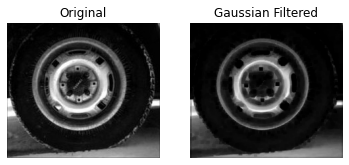

In [43]:
plt.subplot(1, 2, 1)
plt.imshow(tire, cmap='gray',vmin=0,vmax=255)
plt.title("Original")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(tire_min, cmap='gray',vmin=0,vmax=255)
plt.title("Minimum Filtered")
plt.axis("off")
plt.show()

##### Maximum Filter

In [44]:
tire_max = filters.rank.maximum(tire_gray, selem=morphology.square(4))

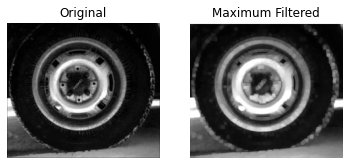

In [45]:
plt.subplot(1, 2, 1)
plt.imshow(tire, cmap='gray',vmin=0,vmax=255)
plt.title("Original")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(tire_max, cmap='gray',vmin=0,vmax=255)
plt.title("Maximum Filtered")
plt.axis("off")
plt.show()

### Sharpening Filter

#### Edge Detection

In [46]:
butterfly = io.imread(f"{STATIC_BASE_DIR}/butterfly.jpg")
butterfly_gray = color.rgb2gray(butterfly)
butterfly_prewitt = util.img_as_ubyte(filters.prewitt(butterfly_gray))
butterfly_roberts = util.img_as_ubyte(filters.roberts(butterfly_gray))
butterfly_sobel = util.img_as_ubyte(filters.sobel(butterfly_gray))

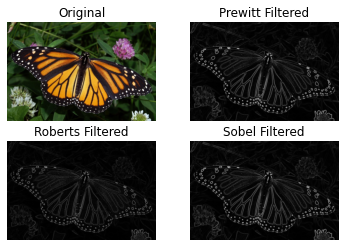

In [49]:
plt.subplot(2, 2, 1)
plt.imshow(butterfly)
plt.title("Original")
plt.axis("off")
plt.subplot(2, 2, 2)
plt.imshow(butterfly_prewitt, cmap="gray")
plt.title("Prewitt Filtered")
plt.axis("off")
plt.subplot(2, 2, 3)
plt.imshow(butterfly_roberts, cmap="gray")
plt.title("Roberts Filtered")
plt.axis("off")
plt.subplot(2, 2, 4)
plt.imshow(butterfly_sobel, cmap="gray")
plt.title("Sobel Filtered")
plt.axis("off")
plt.show()

#### Sharpening Image

In [50]:
tire_blur = filters.rank.mean(tire_gray, selem=morphology.square(3))
tire_sharp = filters.unsharp_mask(tire_blur, radius=3)

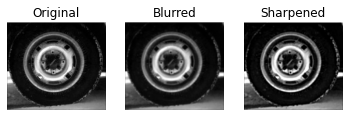

In [52]:
plt.subplot(1, 3, 1)
plt.imshow(tire)
plt.title("Original")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(tire_blur, cmap="gray")
plt.title("Blurred")
plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(tire_sharp, cmap="gray")
plt.title("Sharpened")
plt.axis("off")
plt.show()